<a href="https://colab.research.google.com/github/zzhining/public_data_analysis/blob/main/w02_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 02. 공공데이터를 활용한 데이터 전처리(1)

## 실습 목표
---
- 데이터 정제
    - 데이터의 결측치 및 이상치 여부 확인
- 월평균 소득은?
    - 전공별 월평균소득의 통계치 확인
    - 성별, 전공별 월평균 소득의 통계치 확인

## 데이터
---

* [고용조사분석시스템](https://survey.keis.or.kr/goms/gomsdownload/List.jsp)

- 대졸자들의 노동시장 진입과 정착 과정에 대한 실증적 자료가 요구됨에 따라  『대졸자직업이동경로조사』를 실시
- 대졸자의 교육과정, 구직활동, 일자리경험, 직업훈련, 자격증, 개인신상정보 및 가계배경 등 노동시장 진입 및 정착에 영향을 줄 수 있는 항목 조사
- GOMS2019.csv
    - shape: (11652, 130)
- GOMS2019_columns.csv
    - shape: (159, 3)


## 1. 데이터 읽기
---



### 1.1 라이브러리 불러오기
 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [ ]:
# GOMS2019.csv 파일을 읽어오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019.csv')

# 열 이름 정보 담은 파일 불러오기
df_columns = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019_columns.csv')

df.shape, df_columns.shape

((11652, 130), (159, 3))


### 1.3 데이터 탐색
---

`df`의 컬럼별 요약정보(info)를 확인합니다. 각 컬럼별 데이터 타입과 결측치 여부를 확인합니다.

In [ ]:
# 컬럼별 요약정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 130 entries, 이직여부 to wt
dtypes: float64(4), int64(126)
memory usage: 11.6 MB


In [ ]:
df.describe()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,...,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
count,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.0,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,...,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.0,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000
mean,1.785530,3.802437,1.817628,6.873326,1.418126,26.879692,2017.816083,2017.829557,10.862599,3.240474,4.673361,4.347322,1.0,6.142379,3.213526,0.218675,2.349897,1.259955,5.044971,40.711552,3.128991,0.538363,245.312908,221.610196,3.286389,3.810676,3.802866,3.884827,3.740474,3.664693,3.855561,3.581102,3.311878,3.717044,3.757381,3.732149,3.780467,3.588826,3.625472,3.682973,3.029866,3.053725,3.340628,5.473653,3.372726,2.878647,1.648215,1.245966,2.268967,1.162032,...,1.860110,1.908514,1.896928,1.401219,1.657484,1.957518,2942.006351,1.733608,1.836852,1.564796,4.407484,4.356162,4.361483,3.731377,3.724682,3.960522,4.273344,4.275489,4.329042,4.251202,4.175077,3.437779,3.846979,3.643323,3.640062,5.338054,5.470134,5.234895,1.056728,1.531153,2.125815,2.483093,1.0,6.743821,6.421215,3.862685,3.548575,4.907484,3.240817,2.175077,2023.725712,1.874785,1.734895,1.934861,90.796258,17.103673,7.432029,7.392207,1.073292,27.303291
std,0.410472,1.769656,0.427717,4.856847,0.493272,4.467500,0.387433,2.240143,5.190021,2.448687,3.472896,2.820669,0.0,4.877583,2.024881,0.435015,1.996961,0.816300,0.445746,7.086318,5.367781,1.467113,105.989095,94.868042,0.993124,0.932829,0.867211,0.877798,1.009320,0.998194,0.908571,1.008860,0.951878,0.863139,0.912680,0.850464,0.923772,0.953789,0.843803,0.831164,0.687293,0.667705,1.257816,1.237170,1.154759,1.256497,0.477548,0.524489,0.572228,0.453870,...,0.346888,0.288312,0.304067,0.490166,0.474572,0.201695,941.177686,0.442091,0.369516,0.495805,0.632921,0.663421,0.713507,1.099746,0.855582,0.801886,0.724073,0.725688,0.731857,0.673042,0.734105,1.042315,0.888137,0.962772,0.960485,1.173017,1.124420,1.237558,0.251935,0.499050,1.121016,1.439528,0.0,4.864681,4.678806,1.282923,1.158813,1.955348,1.566325,1.171678,2609.275410,0.478022,0.526044,1.485418,99.663567,66.773162,45.669087,57.890833,0.445021,18.293701
min,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,2017.000000,1983.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

## 2. 데이터 전처리
----


### 2.1 데이터 정제
-----

#### 결측치 처리

In [ ]:
# 데이터 프레임에 na값이 포함되어있는지 여부를 확인
df.isna().sum()

이직여부        0
majorcat    0
school      0
area        0
sex         0
age         0
graduy      0
a001        0
industry    0
job         0
a010        0
a011        0
a012        0
a014        0
a016        0
a018        0
a020        0
a021        0
a116        0
a117        0
a118        0
a119        0
a122        0
a125        0
a126        0
a127        0
a128        0
a129        0
a130        0
a131        0
a132        0
a133        0
a134        0
a135        0
a136        0
a137        0
a138        0
a139        0
a140        0
a141        0
a142        0
a143        0
a144        0
a145        0
a146        0
a151        0
a153        0
a158        0
a159        0
a160        0
a161        0
a162        0
a166        0
a168        0
a281        0
a282        0
a388        0
e001        0
f001        0
f004        0
f006        0
f008        0
f009        0
f010        0
f011        0
f013        0
f170        0
f023        0
f071        0
f072        0
f074        0
f079  

In [ ]:
# 결측치를 삭제
df.dropna(inplace = True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
# 결측치 처리 이후 shape
df.shape 

(11652, 130)

#### 중복값 확인

In [ ]:
# 중복값 포함여부를 확인
df.duplicated().sum()

0

In [ ]:
# 중복값 삭제
df.drop_duplicates()

#### 이상치 확인
percentile 기반의 이상치 여부를 확인

In [ ]:
df['f074'].describe()

count    11652.000000
mean         3.613174
std          0.430819
min          1.000000
25%          3.300000
50%          3.700000
75%          3.900000
max          4.500000
Name: f074, dtype: float64

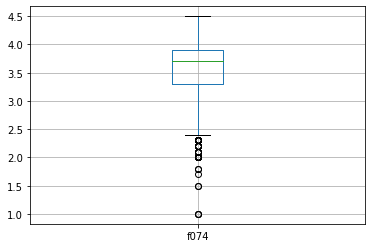

In [ ]:
df.boxplot(column=['f074'])

In [ ]:
Q1 = df['f074'].quantile(q=0.25) #1사분위수
Q3 = df['f074'].quantile(q=0.75) #3사분위수
IQR = Q3-Q1
print('Q1:{}, Q3:{}, IQR:{:.2f}'.format(Q1, Q3, IQR))

lower_fence = Q1 - IQR*1.5
upper_fence = Q3 + IQR*1.5
print('lower fence:{:.2f}, upper fence:{:.2f}'.format(lower_fence, upper_fence))

Q1:3.3, Q3:3.9, IQR:0.60
lower fence:2.40, upper fence:4.80


In [ ]:
df['f074'][(df['f074'] < lower_fence) | (df['f074'] > upper_fence)]

19       2.0
67       2.1
100      1.0
262      2.3
277      2.0
373      2.3
399      2.3
473      2.3
526      2.0
547      2.3
548      2.0
778      2.2
1027     2.3
1058     2.3
1124     2.0
1244     2.0
1291     2.2
1505     1.7
1514     2.3
1573     2.1
1579     2.3
1975     2.0
1986     2.3
2076     2.1
2169     2.0
2292     2.3
2336     2.3
2393     2.2
2447     2.0
2503     2.0
2714     2.2
3393     2.3
3538     1.8
3585     2.2
3665     2.3
3668     2.0
3699     2.3
4011     2.0
4080     2.0
4316     2.1
4326     2.3
4373     2.0
4374     2.3
4437     2.2
4511     2.3
4561     2.3
4635     2.2
4940     2.0
4955     2.0
5042     2.3
5108     2.0
5180     2.0
5191     2.3
5725     2.0
5826     2.3
5946     2.3
6078     1.0
6254     2.3
6281     2.3
6499     2.0
6513     1.8
6537     2.3
6682     1.0
6794     2.0
7232     2.1
7445     2.0
7508     2.0
7542     2.3
7705     2.3
7790     2.0
7831     2.3
7887     2.0
7955     2.0
8004     2.3
8143     2.3
8194     2.0
8198     2.0

### 2.2 데이터 통합
-----




In [ ]:
df2 = df[['majorcat', 'sex', 'a122', 'f074']]
df2.head()

,majorcat,sex,a122,f074
0,1,1,112,4.1
1,1,1,180,3.9
2,1,1,180,3.8
3,1,1,260,3.9
4,1,2,240,3.0


In [ ]:
df_columns.head()

,columns,desc,label
0,majorcat,전공계열,"인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7"
1,school,학교유형,"2~3년제(1), 4년제(2), 교육대(3)"
2,area,학교소재지,"서울1,부산2,대구3,대전4,인천5,광주6,울산7,경기8,강원9,충북10,충남11,..."
3,sex,성별,"남1, 여2"
4,age,연령,NaN


In [ ]:
pd.concat([df_columns[df_columns['columns']=='f074'], df_columns[df_columns['columns']=='a122']])

,columns,desc,label
67,f074,졸업 평점,NaN
19,a122,월평균 근로소득_만원,NaN


In [ ]:
major_df = pd.DataFrame({'major':['인문', '사회', '교육', '공학', '자연', '의약', '예체능'],
                         'majorcat':[1,2,3,4,5,6,7]})
major_df

,major,majorcat
0,인문,1
1,사회,2
2,교육,3
3,공학,4
4,자연,5
5,의약,6
6,예체능,7


In [ ]:
# df2: 'majorcat', 'sex', 'a122', 'f074'

df2 = pd.merge(df2, major_df)
df2

,majorcat,sex,a122,f074,major
0,1,1,112,4.1,인문
1,1,1,180,3.9,인문
2,1,1,180,3.8,인문
3,1,1,260,3.9,인문
4,1,2,240,3.0,인문
...,...,...,...,...,...
11647,7,2,80,3.8,예체능
11648,7,2,120,3.6,예체능
11649,7,2,200,3.3,예체능
11650,7,2,150,3.3,예체능


In [ ]:
gender_df = pd.DataFrame({'성별':['남', '여'],
                         'sex':[1,2]})
gender_df

,성별,sex
0,남,1
1,여,2


In [ ]:
df2 = pd.merge(df2, gender_df) #inner join
df2

,majorcat,sex,a122,f074,major,성별
0,1,1,112,4.1,인문,남
1,1,1,180,3.9,인문,남
2,1,1,180,3.8,인문,남
3,1,1,260,3.9,인문,남
4,1,1,200,3.0,인문,남
...,...,...,...,...,...,...
11647,7,2,150,3.4,예체능,여
11648,7,2,80,3.8,예체능,여
11649,7,2,120,3.6,예체능,여
11650,7,2,200,3.3,예체능,여


In [ ]:
df2.rename(columns = {'a122':'월평균소득','f074':'졸업평점'},inplace=True)

In [ ]:
df2.head()

,majorcat,sex,월평균소득,졸업평점,major,성별
0,1,1,112,4.1,인문,남
1,1,1,180,3.9,인문,남
2,1,1,180,3.8,인문,남
3,1,1,260,3.9,인문,남
4,1,1,200,3.0,인문,남


### 2.3 데이터 변환
-----


In [ ]:
df2.groupby(['major'])['월평균소득'].mean().sort_values()

major
예체능    208.219344
인문     227.700868
교육     230.889454
자연     236.178799
사회     248.070490
공학     261.861254
의약     271.418964
Name: 월평균소득, dtype: float64

In [ ]:
df2.groupby(['major', '성별'])['월평균소득'].mean()

major  성별
공학     남     269.273484
       여     229.186490
교육     남     248.227106
       여     221.680934
사회     남     269.931062
       여     221.076321
예체능    남     225.831486
       여     196.984441
의약     남     295.974860
       여     255.406193
인문     남     247.224453
       여     212.820584
자연     남     251.293454
       여     216.485294
Name: 월평균소득, dtype: float64

In [ ]:
df2.groupby(['성별', 'major'])['월평균소득'].mean()

성별  major
남   공학       269.273484
    교육       248.227106
    사회       269.931062
    예체능      225.831486
    의약       295.974860
    인문       247.224453
    자연       251.293454
여   공학       229.186490
    교육       221.680934
    사회       221.076321
    예체능      196.984441
    의약       255.406193
    인문       212.820584
    자연       216.485294
Name: 월평균소득, dtype: float64

In [ ]:
df2.groupby(['성별', 'major'])['월평균소득'].describe()

count        mean         std   min     25%    50%    75%     max
성별 major                                                                    
남  공학     3002.0  269.273484  102.287796  -1.0  208.00  250.0  310.0  1250.0
   교육      273.0  248.227106   79.263149  35.0  200.00  250.0  280.0   780.0
   사회     1262.0  269.931062  105.109244  -1.0  200.00  250.0  300.0  1000.0
   예체능     451.0  225.831486  123.827435  -1.0  183.00  200.0  250.0  1667.0
   의약      358.0  295.974860  171.160537  -1.0  210.00  260.0  310.0  2000.0
   인문      548.0  247.224453  106.408404  36.0  197.75  230.0  290.0  1300.0
   자연      886.0  251.293454  118.068982  -1.0  187.75  240.0  300.0  1000.0
여  공학      681.0  229.186490   75.043197  -1.0  190.00  220.0  260.0   570.0
   교육      514.0  221.680934   53.424879  10.0  200.00  220.0  250.0   500.0
   사회     1022.0  221.076321   68.757078  -1.0  180.00  200.0  250.0   583.0
   예체능     707.0  196.984441   78.311057  -1.0  175.00  200.0  220.0  1300.0
   의약      549.0  255.406193   96.780099  -1.0  200.00  230.0  300.0  1000.0
   인문      719.0  212.820584   85.439335  -1.0  180.00  200.0  247.0  1200.0
   자연      680.0  216.485294  150.701862  -1.0  173.00  200.0  250.0  3000.0